In [1]:
from urllib import request
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn import decomposition
from sklearn import preprocessing
sns.set()
# Python program to read 
# json file 
 
import json 

In [2]:
import http.client, urllib.request, urllib.parse, urllib.error, base64
import pandas as pd
import string
import json 
import pprint
import hashlib
from colorama import Fore, Back, Style

In [3]:
commentData = pd.read_csv('P7_01_0_training.1600.processed.noemoticon.csv', encoding='ISO-8859-1')

In [4]:
commentData

,target,id,date,flag,user,text
0,4,1467882425,Mon Apr 06 22:38:36 PDT 2009,NO_QUERY,Julia_xxoo,tafe quiz then PHOTOSHOOT with my sezdawg
1,4,1467937329,Mon Apr 06 22:53:54 PDT 2009,NO_QUERY,DeenaWilliams,"@RyanStar Hey Ryan, just thought I'd say that..."
2,4,1468007072,Mon Apr 06 23:13:41 PDT 2009,NO_QUERY,pluggdin,@KesavaReddy mba is good for learning tools/t...
3,4,1468145953,Mon Apr 06 23:58:07 PDT 2009,NO_QUERY,InYourEyes2410,@tommcfly haha morning then. i think (aussie h...
4,4,1468407270,Tue Apr 07 01:28:50 PDT 2009,NO_QUERY,Anjuli_nz,@Azlemed thats good
...,...,...,...,...,...,...
1595,0,2326752569,Thu Jun 25 07:27:54 PDT 2009,NO_QUERY,chrissymassey,i'm so tired!
1596,0,2327023853,Thu Jun 25 07:49:13 PDT 2009,NO_QUERY,brandedyouth,@ispeed72 I hear ya!
1597,0,2327447537,Thu Jun 25 08:21:32 PDT 2009,NO_QUERY,TA_Mobile,Almost of ICsid changed ... No more simple pro...
1598,0,2328250549,Thu Jun 25 09:21:07 PDT 2009,NO_QUERY,Omkaaraa,nobody joined my followers list today ..


In [5]:
resultData = pd.read_csv('P7_01_0_resultats.csv', encoding='ISO-8859-1')

In [6]:
resultData

,id,sentiment,positive,negative,neutral
0,1,Positive,1,0,0
1,2,Positive,1,0,0
2,3,Positive,1,0,0
3,4,Positive,1,0,2
4,5,Positive,1,0,0
...,...,...,...,...,...
1595,1596,Negative,0,1,0
1596,1597,Neutral,0,0,1
1597,1598,Negative,0,1,0
1598,1599,Neutral,0,0,1


In [7]:
resultData['target2']=0
resultData

,id,sentiment,positive,negative,neutral,target2
0,1,Positive,1,0,0,0
1,2,Positive,1,0,0,0
2,3,Positive,1,0,0,0
3,4,Positive,1,0,2,0
4,5,Positive,1,0,0,0
...,...,...,...,...,...,...
1595,1596,Negative,0,1,0,0
1596,1597,Neutral,0,0,1,0
1597,1598,Negative,0,1,0,0
1598,1599,Neutral,0,0,1,0


In [8]:
df = pd.merge(commentData, resultData, left_index = True, right_index = True)

In [9]:
df

,target,id_x,date,flag,user,text,id_y,sentiment,positive,negative,neutral,target2
0,4,1467882425,Mon Apr 06 22:38:36 PDT 2009,NO_QUERY,Julia_xxoo,tafe quiz then PHOTOSHOOT with my sezdawg,1,Positive,1,0,0,0
1,4,1467937329,Mon Apr 06 22:53:54 PDT 2009,NO_QUERY,DeenaWilliams,"@RyanStar Hey Ryan, just thought I'd say that...",2,Positive,1,0,0,0
2,4,1468007072,Mon Apr 06 23:13:41 PDT 2009,NO_QUERY,pluggdin,@KesavaReddy mba is good for learning tools/t...,3,Positive,1,0,0,0
3,4,1468145953,Mon Apr 06 23:58:07 PDT 2009,NO_QUERY,InYourEyes2410,@tommcfly haha morning then. i think (aussie h...,4,Positive,1,0,2,0
4,4,1468407270,Tue Apr 07 01:28:50 PDT 2009,NO_QUERY,Anjuli_nz,@Azlemed thats good,5,Positive,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0,2326752569,Thu Jun 25 07:27:54 PDT 2009,NO_QUERY,chrissymassey,i'm so tired!,1596,Negative,0,1,0,0
1596,0,2327023853,Thu Jun 25 07:49:13 PDT 2009,NO_QUERY,brandedyouth,@ispeed72 I hear ya!,1597,Neutral,0,0,1,0
1597,0,2327447537,Thu Jun 25 08:21:32 PDT 2009,NO_QUERY,TA_Mobile,Almost of ICsid changed ... No more simple pro...,1598,Negative,0,1,0,0
1598,0,2328250549,Thu Jun 25 09:21:07 PDT 2009,NO_QUERY,Omkaaraa,nobody joined my followers list today ..,1599,Neutral,0,0,1,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   target     1600 non-null   int64 
 1   id_x       1600 non-null   int64 
 2   date       1600 non-null   object
 3   flag       1600 non-null   object
 4   user       1600 non-null   object
 5   text       1600 non-null   object
 6   id_y       1600 non-null   int64 
 7   sentiment  1600 non-null   object
 8   positive   1600 non-null   int64 
 9   negative   1600 non-null   int64 
 10  neutral    1600 non-null   int64 
 11  target2    1600 non-null   int64 
dtypes: int64(7), object(5)
memory usage: 150.1+ KB


In [11]:
for index, row in df.iterrows():         
                if row['sentiment'] == 'Negative':
                    row['target2'] = 0
                    df.at[index,'target2'] = row['target2']  
                if row['sentiment'] == 'Neutral':
                    row['target2'] = 2
                    df.at[index,'target2'] = row['target2']  
                if row['sentiment'] == 'Positive':
                    row['target2'] = 4
                    df.at[index,'target2'] = row['target2']  
                    

In [12]:
df

,target,id_x,date,flag,user,text,id_y,sentiment,positive,negative,neutral,target2
0,4,1467882425,Mon Apr 06 22:38:36 PDT 2009,NO_QUERY,Julia_xxoo,tafe quiz then PHOTOSHOOT with my sezdawg,1,Positive,1,0,0,4
1,4,1467937329,Mon Apr 06 22:53:54 PDT 2009,NO_QUERY,DeenaWilliams,"@RyanStar Hey Ryan, just thought I'd say that...",2,Positive,1,0,0,4
2,4,1468007072,Mon Apr 06 23:13:41 PDT 2009,NO_QUERY,pluggdin,@KesavaReddy mba is good for learning tools/t...,3,Positive,1,0,0,4
3,4,1468145953,Mon Apr 06 23:58:07 PDT 2009,NO_QUERY,InYourEyes2410,@tommcfly haha morning then. i think (aussie h...,4,Positive,1,0,2,4
4,4,1468407270,Tue Apr 07 01:28:50 PDT 2009,NO_QUERY,Anjuli_nz,@Azlemed thats good,5,Positive,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0,2326752569,Thu Jun 25 07:27:54 PDT 2009,NO_QUERY,chrissymassey,i'm so tired!,1596,Negative,0,1,0,0
1596,0,2327023853,Thu Jun 25 07:49:13 PDT 2009,NO_QUERY,brandedyouth,@ispeed72 I hear ya!,1597,Neutral,0,0,1,2
1597,0,2327447537,Thu Jun 25 08:21:32 PDT 2009,NO_QUERY,TA_Mobile,Almost of ICsid changed ... No more simple pro...,1598,Negative,0,1,0,0
1598,0,2328250549,Thu Jun 25 09:21:07 PDT 2009,NO_QUERY,Omkaaraa,nobody joined my followers list today ..,1599,Neutral,0,0,1,2


In [13]:
df.to_csv('P7_01_1_dfresultats.csv', index=False, header=True)

In [14]:
train_df = df.drop(["target","id_x","date","flag","user","text","id_y","sentiment"], axis=1)
train_df = train_df.rename(columns={"target2": "target"})
train_df

,positive,negative,neutral,target
0,1,0,0,4
1,1,0,0,4
2,1,0,0,4
3,1,0,2,4
4,1,0,0,4
...,...,...,...,...
1595,0,1,0,0
1596,0,0,1,2
1597,0,1,0,0
1598,0,0,1,2


In [15]:
xtrain1 = train_df
xtrain1

,positive,negative,neutral,target
0,1,0,0,4
1,1,0,0,4
2,1,0,0,4
3,1,0,2,4
4,1,0,0,4
...,...,...,...,...
1595,0,1,0,0
1596,0,0,1,2
1597,0,1,0,0
1598,0,0,1,2


In [16]:
X = xtrain1.values
y = df['target'].values

In [17]:
X

array([[1, 0, 0, 4],
       [1, 0, 0, 4],
       [1, 0, 0, 4],
       ...,
       [0, 1, 0, 0],
       [0, 0, 1, 2],
       [0, 0, 1, 2]], dtype=int64)

In [18]:
y

array([4, 4, 4, ..., 0, 0, 0], dtype=int64)

In [19]:
#Séparation des données en un jeu d’entraînement et un jeu de test. Le jeu de test sera stratifié
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, test_size=0.7, random_state=42)

## Régression logistique

In [20]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

lr = LogisticRegression(random_state = 0,solver = 'liblinear', multi_class = 'auto')

lr.fit(X_train,y_train)

# On récupère la prédiction de la valeur positive
y_prob = lr.predict_proba(X_test)[:,1] 

#précision du modèle
precision = lr.score(X_test,y_test)
print("precision en % : {:.2f}".format(precision*100))
print(precision*100)


precision en % : 70.36
70.35714285714286


In [21]:
y_prob

array([0.72272386, 0.21443742, 0.29682094, ..., 0.29602231, 0.72502006,
       0.80303952])

### Matrice de confusion

[[330 230]
 [102 458]]


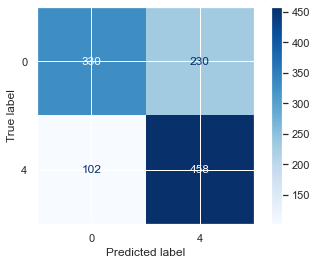

In [22]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(lr, X_test, y_test, cmap=plt.cm.Blues)



print(disp.confusion_matrix)

plt.show()

### Courbe ROC

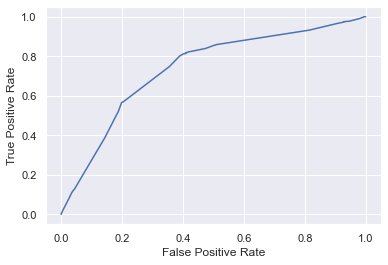

In [23]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
y_score = lr.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=lr.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [24]:
roc_auc = auc(fpr, tpr)
print(roc_auc)
print("AUC : {:.2f}".format(roc_auc))
print("RMSE : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_score))))

0.7364636479591836
AUC : 0.74
RMSE : 2.76


### Rappel "Recall"

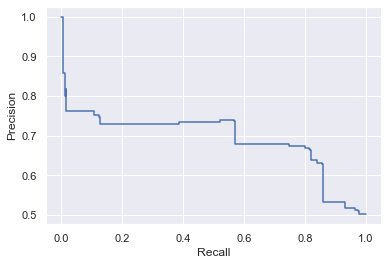

In [25]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=lr.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

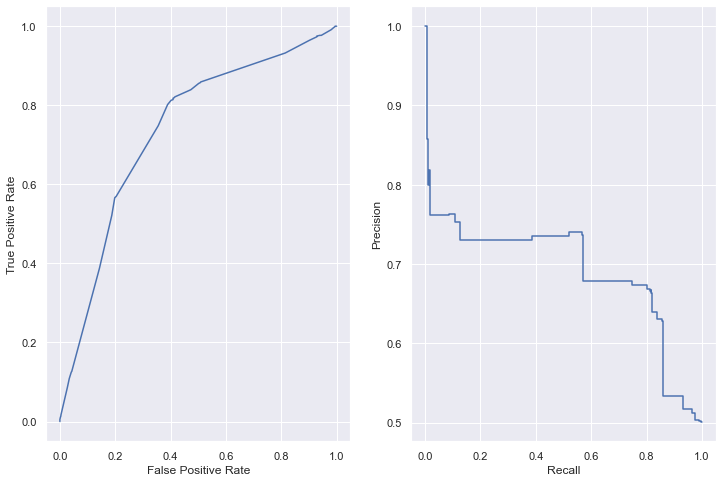

In [26]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

roc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)
plt.show()